# Cours PCD - Laboratoire 8 : Lissage exponentiel et prévision

## 1. Importation des librairies et de `statsmodels`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

## 3. Chargement des données

Chargement des données dans un objet et séparation en données d'entraînement et de test (valeurs de test à partir du 1er août 2010):

In [2]:
def split_series(series, ratio=0.8):
    return np.split(series, [int(ratio * len(series))])

In [3]:
data = pd.read_csv("data/auscafe.csv",  dtype = {"Y" : np.float32 }, parse_dates=["date"])

auscafe = pd.Series(np.array(data["Y"]), data["date"]) # Conversion en tableau numpy pour éviter de remplir de NaN (bug?)
train, test = split_series(auscafe)

print(f"train size: {len(train)}")
print(f"test size: {len(test)}")

train size: 340
test size: 86


In [4]:
forecast_size = 86

## 4. Entraînement d'un modèle _Simple Exponential Smoothing_

In [5]:
def plot_series(series):
    ax = series.plot()
    ax.set_xlabel("Year")
    ax.set_ylabel("Monthly expenses (billions of $)")

In [6]:
def plot_fit(data, fit):
    plt.figure(figsize=(12, 8))
    (a,) = plt.plot(data, marker="o", markersize=3, color="black")
    (b,) = plt.plot(fit, marker="o", markersize=3, color="red")

    plt.xlabel("Year")
    plt.ylabel("Monthly expenses (billions of $)")
    plt.legend([a, b], ["data", "fit"])

In [7]:
def rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

In [8]:
def mape(actual, pred):
    return mean_absolute_percentage_error(actual, pred)

Graphique des données d'origine:

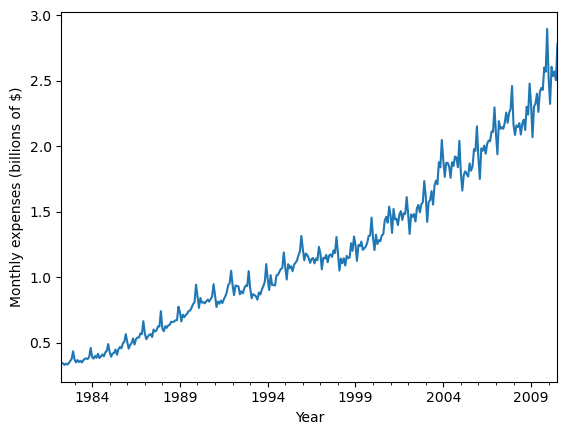

In [9]:
plot_series(train)

Graphique de la courbe lissée:

/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


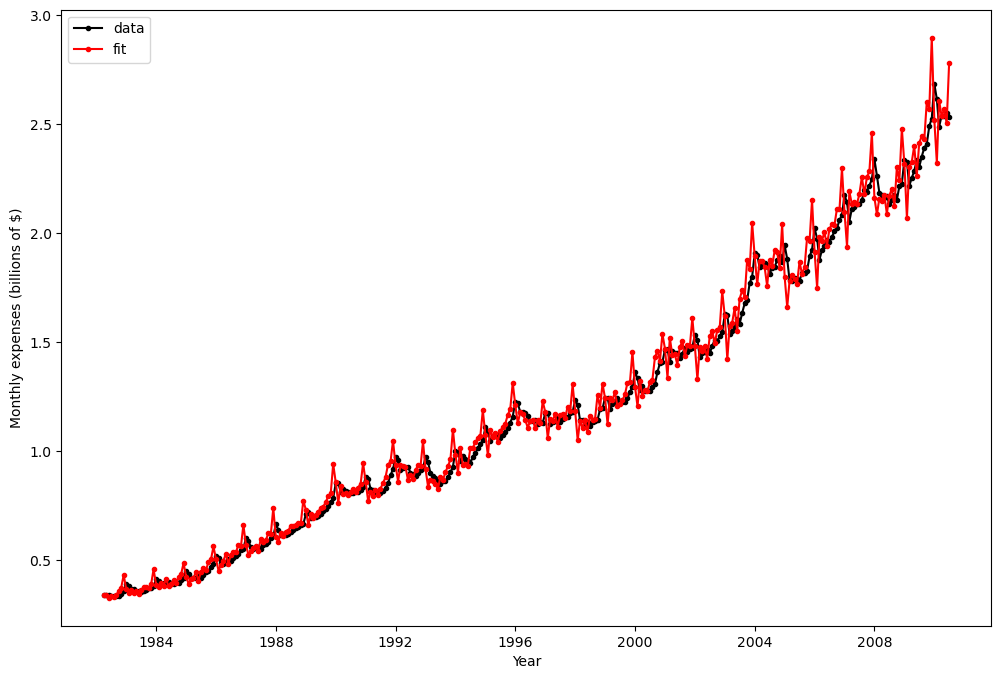

In [10]:
fit1 = SimpleExpSmoothing(train).fit()
plot_fit(fit1.fittedvalues, train)

Graphique de la prédiction (86 valeurs) vs valeur réelles:

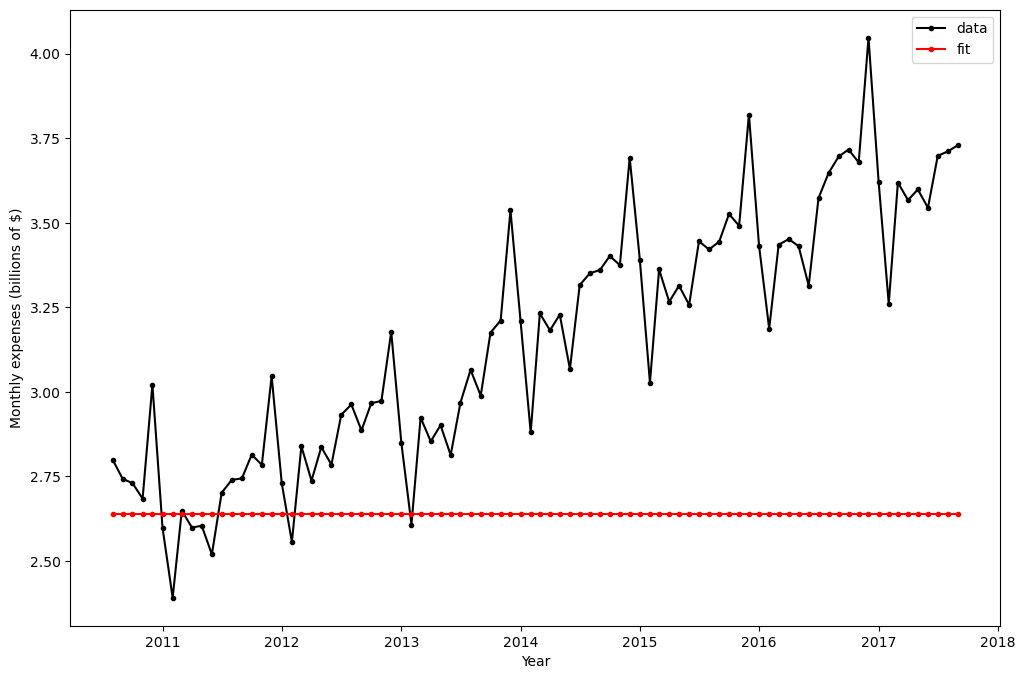

In [11]:
fcast1 = fit1.forecast(forecast_size)
plot_fit(test, fcast1)

Calcul des valeurs _RSME_ et _MAPE_:

In [12]:
print(f"rmse: {rmse(test, fcast1):0.3}")
print(f"mape: {mape(test, fcast1):0.3%}:")

rmse: 0.637
mape: 15.740%:


On constate avec ces valeurs que la performance du modèle est médiocre

## 5. Entraînement d'un modèle _Holt_

Entraînement de 4 modèles _Holt_ avec différents paramètres `exponential` et `damped_trend`:

In [13]:
fit1 = Holt(train, initialization_method="estimated", exponential=False, damped_trend=False).fit()
fit2 = Holt(train, initialization_method="estimated", exponential=True, damped_trend=False).fit()
fit3 = Holt(train, initialization_method="estimated", exponential=False, damped_trend=True).fit()
fit4 = Holt(train, initialization_method="estimated", exponential=True, damped_trend=True).fit()

/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Calcul des prédictions:

In [14]:
fcast1 = fit1.forecast(forecast_size)
fcast2 = fit2.forecast(forecast_size)
fcast3 = fit3.forecast(forecast_size)
fcast4 = fit4.forecast(forecast_size)

Affichage des performances _RMSE_ et _MAPE_ pour chaque prédiction:

In [15]:
print(f"fit1 rmse: {rmse(test, fcast1):0.3}")
print(f"fit1 mape: {mape(test, fcast1):0.3%}\n")

print(f"fit2 rmse: {rmse(test, fcast2):0.3}")
print(f"fit2 mape: {mape(test, fcast2):0.3%}\n")

print(f"fit3 rmse: {rmse(test, fcast3):0.3}")
print(f"fit3 mape: {mape(test, fcast3):0.3%}\n")

print(f"fit4 rmse: {rmse(test, fcast4):0.3}")
print(f"fit4 mape: {mape(test, fcast4):0.3%}")

fit1 rmse: 0.328
fit1 mape: 7.835%

fit2 rmse: 0.278
fit2 mape: 7.341%

fit3 rmse: 0.287
fit3 mape: 6.783%

fit4 rmse: 0.244
fit4 mape: 5.831%


On constate que le 4ème modèle (`exponential` et `damped_trend` activés) possède les meilleures performances (valeurs _RMSE_ et _MAPE_ minimales).

On affiche sa courbe lissée puis sa prédiction:

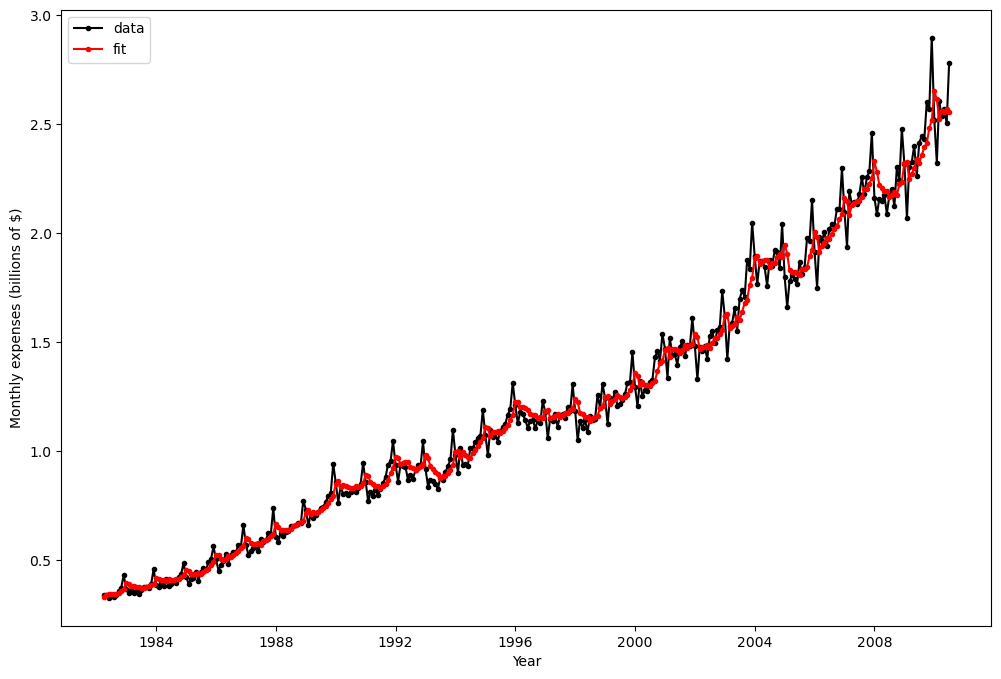

In [16]:
plot_fit(train, fit4.fittedvalues)

Prédiction:

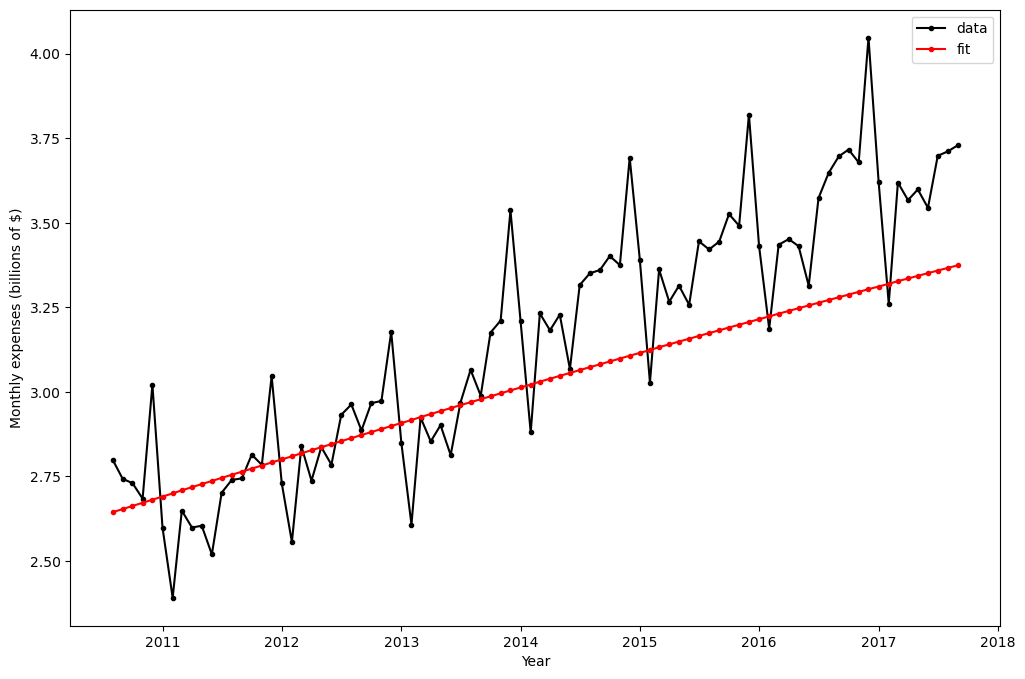

In [17]:
plot_fit(test, fcast4)